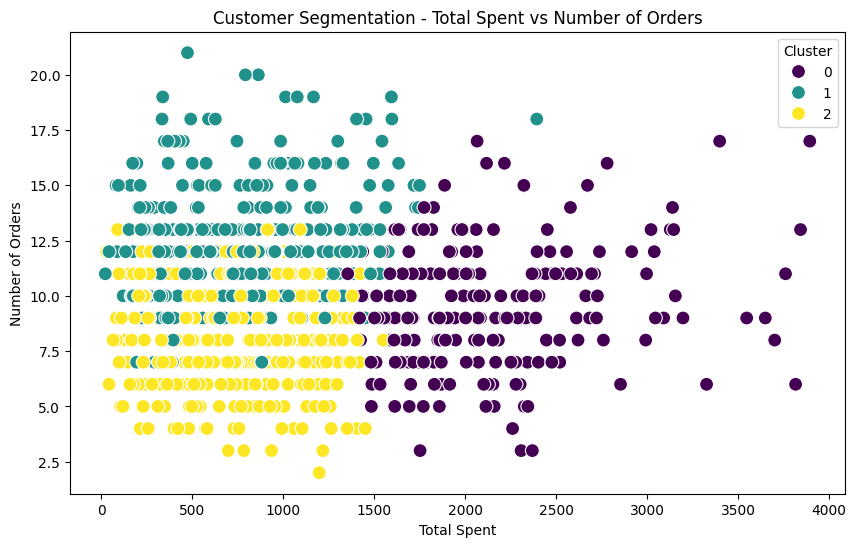

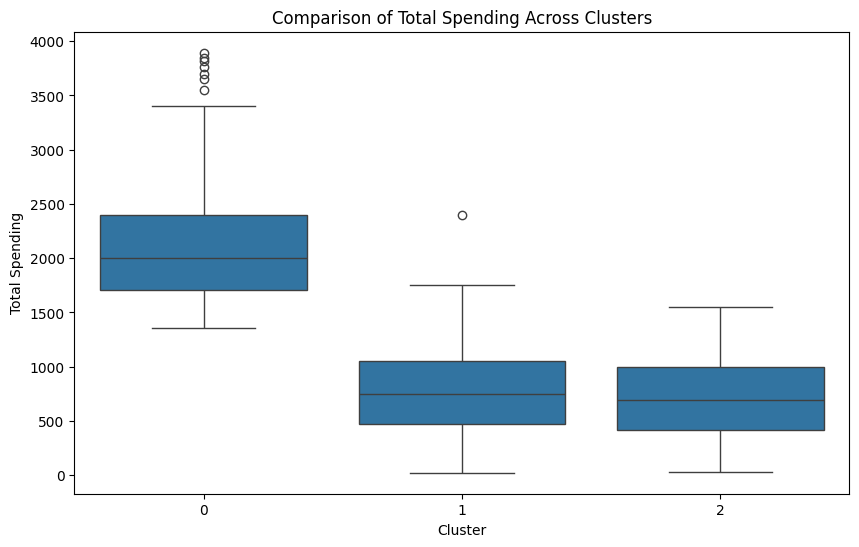

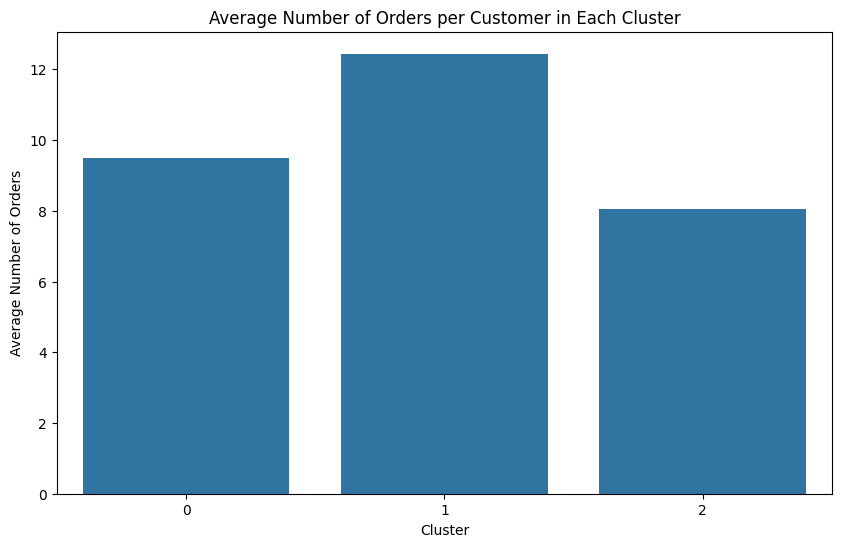

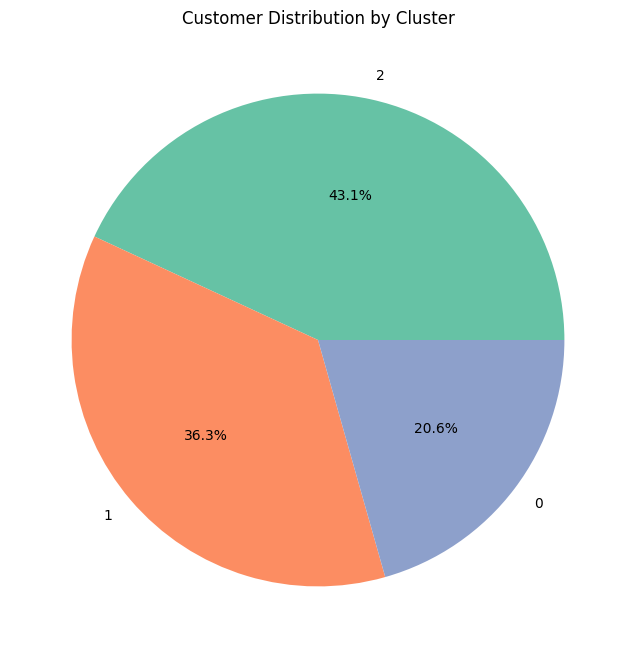

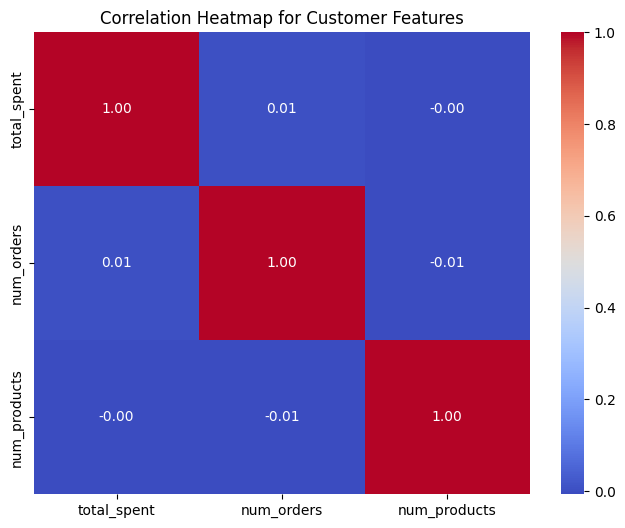

Cluster Summary Statistics:
  cluster  total_spent             num_orders           num_products          
                  mean         std       mean       std         mean       std
0       0  2131.355087  547.444854   9.490291  2.758119     4.951456  1.996967
1       1   782.195811  401.294697  12.440771  2.538911     3.906336  1.813710
2       2   712.224840  361.163357   8.051044  2.138722     5.788863  1.976482


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set a random seed for reproducibility
np.random.seed(42)

# Create synthetic data
# Simulate customer order data
num_customers = 1000

# Simulate data for total spending, number of orders, and number of unique products bought
data = {
    'customer_id': range(1, num_customers + 1),
    'total_spent': np.random.gamma(2, 500, num_customers),  # Total spending in currency
    'num_orders': np.random.poisson(10, num_customers),  # Number of orders per customer
    'num_products': np.random.poisson(5, num_customers)  # Number of unique products ordered
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
df.head()

# Normalize the data for better clustering performance (scaling the data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['total_spent', 'num_orders', 'num_products']])

# K-Means Clustering
# Define the number of clusters (segments)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model to the scaled data
df['cluster'] = kmeans.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
df['cluster'] = df['cluster'].astype(int)

# Display the first few rows of the DataFrame with the cluster labels
df.head()

# Visualize the customer segmentation in 2D space (using Total Spent and Number of Orders)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_spent', y='num_orders', hue='cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segmentation - Total Spent vs Number of Orders')
plt.xlabel('Total Spent')
plt.ylabel('Number of Orders')
plt.legend(title='Cluster')
plt.show()

# Boxplot to compare the distribution of total spending across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='total_spent', data=df)
plt.title('Comparison of Total Spending Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Total Spending')
plt.show()

# Bar plot to show the average number of orders per cluster
avg_orders = df.groupby('cluster')['num_orders'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='num_orders', data=avg_orders)
plt.title('Average Number of Orders per Customer in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Orders')
plt.show()

# Pie chart showing customer distribution across clusters
cluster_counts = df['cluster'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Customer Distribution by Cluster')
plt.show()

# Heatmap to visualize correlations between features
correlation = df[['total_spent', 'num_orders', 'num_products']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Customer Features')
plt.show()

# Insights per cluster
# Calculate the average spending, orders, and products per cluster
cluster_summary = df.groupby('cluster').agg({
    'total_spent': ['mean', 'std'],
    'num_orders': ['mean', 'std'],
    'num_products': ['mean', 'std']
}).reset_index()

print("Cluster Summary Statistics:")
print(cluster_summary)
